# Multiple Linear Regression with a Single Perceptron and Two Input Nodes

## Table of Contents
1. [What is a Linear Regression using 2 Input Nodes](#1.0)
2. [Finding the Parameters](#2.0)
   1. [Loss Function(L) and Cost Function(C)](#2.1)
   2. [Partial Derivatives](#2.2)
   3. [Forward and Back Propagation](#2.3)
3. [Implementation](#3.0)
   1. [Dataset](#3.1)
   2. [Data Preprocessing](#3.2)
   3. [Training the Model](#3.3)
   4. [Model](#3.4)
   5. [Predictions](#3.5)
   6. [Comparing results with scikit learn](#3.6)


<a id="1.0"></a>
## What is a Linear Regression using 2 Input Nodes

A Linear Regression with two input nodes  involves drawing a plane ($\hat{y} = w_{1}x_{1} + w_{2}x_{2} + b$) that best describes the relationship between three variables.
In other words, given a set of x1-axis values and x2-axis values, we aim to predict the corresponding y-axis values. For each prediction, we
plug the $x_{1}$ and $x_{2}$ values into the equation of the plane to obtain the predicted value $\hat{y}$.
For each prediction, we calculate the residual error as the difference between the the predicted value $\hat{y}$ and the observed value $y$.
The line that minimizes the sum of the squared residuals is chosen, ensuring that no other line provides a smaller sum.

$$\text{Sum of squared residuals for n predictions} =\sum_{i=1}^{n} \left( \hat{y}_{i} - y_{i} \right)^2$$


<a id="2.0"></a>
## Finding the Parameters 

For this case, we need to determine the parameters $w_{1}$,$w_{2}$ and $b$. First we must define an equation (the loss function) that measures the error for individual predictions. To optimize the model, we use a cost function, which is the average of the loss function over all training examples. With the cost function defined, in terms of the parameters $w_{1}$,$w_{2}$ and $b$, we can apply gradient descent to find the values that minimize it. This involves calculating the partial derivatives of the cost function with respect to $w_{1}$,$w_{2}$ and $b$ and iteratively updating the parameters in the direction that reduces the error.

<a id="2.1"></a>
### Loss Function(L) and Cost Function(C)

$$\hat{y} = w_{1}x_{1} + w_{2}x_{2} + b$$
$$\text{L} =\sum_{i=1}^{n} \left( \hat{y}_{i} - y_{i} \right)^2$$
$$\text{C} =\frac{\sum_{i=1}^{n} \left( \hat{y}_{i} - y_{i} \right)^2}{n}\frac{1}{2}$$
 

For this case of cost function, we will divide by two merely for convenience, as taking the partial derivative will result in a simpler expression

<a id="2.2"></a>
### Partial Derivatives

\begin{align}
\frac{\partial \mathcal{C} }{ \partial w_{1} } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(\hat{y}_{i} - y_{i}\right)x_{1i},\\
\frac{\partial \mathcal{C} }{ \partial w_{2} } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(\hat{y}_{i} - y_{i}\right)x_{2i},\\
\frac{\partial \mathcal{C} }{ \partial b } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(\hat{y}_{i} - y_{i}\right).
\end{align}

<a id="2.3"></a>
### Forward and Back Propagation

The goal at the end of the algorithm is to determine the optimal 
𝑤 and 𝑏

Forward Propagation:
We must first guess any value for 𝑤, and b. 
typically 𝑏 is initialized to 0. 
Using these parameters, we can calculate our initial cost.

Backward Propagation:
We now determine the corrections for the parameters based on gradient descent:

\begin{align}
\alpha    &= \text{learning rate}, \\
w_{(1)2}    &= w_{(1)1} - \alpha \frac{\partial \mathcal{C}}{ \partial w_{1}}, \\
w_{(2)2}    &= w_{(2)1} - \alpha \frac{\partial \mathcal{C}}{ \partial w_{2}}, \\
b_{2}     &= b_{1} - \alpha \frac{\partial \mathcal{C}}{ \partial b}.
\end{align}

Now, using the new 𝑤 and 𝑏, we perform the process again for a predetermined number of cycles. The calculated cost should decrease until it converges. Once convergence is achieved, we will have the optimal 𝑤 and 𝑏.

<a id="3.0"></a>
## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(3)

<a id="3.1"></a>
### Dataset
We will use the columns GrLivArea and OverallQual to predict the SalePrice.

In [2]:
path = "data/house_prices_train.csv"
df = pd.read_csv(path)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
X_multi = df[['GrLivArea', 'OverallQual']]
Y_multi = df['SalePrice']
display(X_multi)
display(Y_multi)

,GrLivArea,OverallQual
0,1710,7
1,1262,6
2,1786,7
3,1717,7
4,2198,8
...,...,...
1455,1647,6
1456,2073,6
1457,2340,7
1458,1078,5


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

<a id="3.2"></a>
### Data Preprocessing

#### Normalization
We need to normalize the values first to help gradient descent converge more efficiently.

In [4]:
X_multi_norm = pd.DataFrame()
Y_multi_norm = pd.DataFrame()
X_multi_norm['GrLivArea'] = (df['GrLivArea'] - np.mean(df['GrLivArea']))/np.std(df['GrLivArea'])
X_multi_norm['OverallQual'] = (df['OverallQual'] - np.mean(df['OverallQual']))/np.std(df['OverallQual'])
Y_multi_norm['SalePrice'] = (df['SalePrice'] - np.mean(df['SalePrice']))/np.std(df['SalePrice'])
display(X_multi_norm)
display(Y_multi_norm)

,GrLivArea,OverallQual
0,0.370333,0.651479
1,-0.482512,-0.071836
2,0.515013,0.651479
3,0.383659,0.651479
4,1.299326,1.374795
...,...,...
1455,0.250402,-0.071836
1456,1.061367,-0.071836
1457,1.569647,0.651479
1458,-0.832788,-0.795151


,SalePrice
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843
...,...
1455,-0.074560
1456,0.366161
1457,1.077611
1458,-0.488523


#### Arranging the values into a matrice form

In [5]:
X_multi_norm = np.array(X_multi_norm)
Y_multi_norm = np.array(Y_multi_norm)

<a id="3.3"></a>
### Training the model

Cost for iteration 1: 0.484088414143908
Cost for iteration 2: 0.42374093911200367
Cost for iteration 3: 0.3755831836284978
Cost for iteration 4: 0.33608422225125445
Cost for iteration 5: 0.3033958982271313
Cost for iteration 6: 0.27626662953037884
Cost for iteration 7: 0.2537307248753134
Cost for iteration 8: 0.23500514190184596
Cost for iteration 9: 0.21944424622291717
Cost for iteration 10: 0.20651283012184762
Cost for iteration 11: 0.19576646875214038
Cost for iteration 12: 0.18683592278736683
Cost for iteration 13: 0.17941436689650497
Cost for iteration 14: 0.17324682603731856
Cost for iteration 15: 0.16812140973172834
Cost for iteration 16: 0.16386203089194756
Cost for iteration 17: 0.1603223558340685
Cost for iteration 18: 0.1573807767867708
Cost for iteration 19: 0.15493623395234138
Cost for iteration 20: 0.15290474352665684
Cost for iteration 21: 0.15121651238099001
Cost for iteration 22: 0.14981354027477606
Cost for iteration 23: 0.14864762722081828
Cost for iteration 24: 0.14

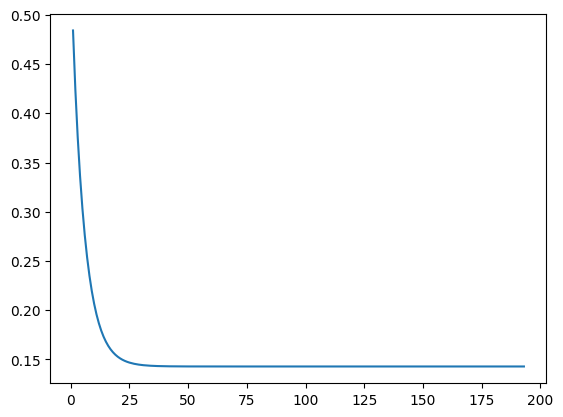

w: [[0.36950627]
 [0.57186162]]
b: [[1.05851401e-16]]


In [6]:
# Random initialization of w1 and w2
w1 = np.random.randn(1,1)*0.01
w2 = np.random.randn(1,1)*0.01
# Initiating b as 0
b = np.zeros((1,1))
# Defining the learning rate
lr = 1.2
# percentage difference between an error and its subsequent one
diff = 0.00000000000000001

# cost log for each iteration
cost_list = []
# counter for each iteration as a list and initial counter_count c
count_list = []
c = 0
# getting the total number of predictions
size = X_multi_norm.shape[0]
# loop start
while True:
    w = np.array([w1,w2])
    w = w.reshape(-1,1)
    # forward propagation
    y_hat = np.matmul(X_multi_norm,w) + b
        # computing cost for the current iteration
    cost = np.sum((y_hat - Y_multi_norm)**2)/(2*size)
        # saving the cost value in a list
    cost_list.append(cost)

    # backward propagation
        # partial derivatives
    dw1 = 1/size * np.matmul(X_multi_norm.T,(y_hat-Y_multi_norm))[0][0]
    dw2 = 1/size * np.matmul(X_multi_norm.T,(y_hat-Y_multi_norm))[1][0]
    db = 1/size *np.sum(y_hat - Y_multi_norm)
        # updating parameters
    w1 = w1 - dw1*lr
    w2 = w2 - dw2*lr
    b = b - db*lr

    #updating counter and saving in a list
    c = c + 1
    count_list.append(c)
    # display the cost for each iteration
    print(f'Cost for iteration {c}: {cost}')
    
    # Checking if the difference between the last two costs is acceptable
    if len(cost_list) >1:
        if ((cost_list[-2] - cost_list[-1])/cost_list[-2]) < diff:
            break
        elif c==200:
            break

# plot the cost for each iteraction
plt.plot(count_list,cost_list)
plt.show()
print(f'w: {w}')
print(f'b: {b}')

<a id="3.4"></a>
### Model
$$\hat{y} = w_{1}x_{1} + w_{2}x_{2} + b$$

In [19]:
print(f'w1 = {w[0][0]}')
print(f'w2 = {w[1][0]}')
print(f'b = {b[0][0]}')

w1 = 0.36950627336957415
w2 = 0.5718616209793602
b = 1.058514007039876e-16


<a id="3.5"></a>
### Predictions

In [8]:
# values to predict
X_pred = [[1710, 7], [1200, 6], [2200, 8]]


X_pred = np.array(X_pred)
X1_pred = X_pred[:,0]
X2_pred = X_pred[:,1]
# values to predict normalized
X_pred_norm = []
# predicted values normalized
Y_pred_norm = []
# predicted values denormalized
Y_pred = []

# normalize values do predict
std_x1 = np.std(df['GrLivArea'])
ux1 = np.mean(df['GrLivArea'])
std_x2 = np.std(df['OverallQual'])
ux2 = np.mean(df['OverallQual'])

X1_pred = (X1_pred-ux1)/std_x1
X2_pred = (X2_pred-ux2)/std_x2
    

# prediction 
for n in range(0,X1_pred.size):
    Y_pred_norm.append(X1_pred[n]*w[0][0]+X2_pred[n]*w[1][0] +b[0][0] )

# denormalize predicted values
for n in Y_pred_norm:
    Y_pred.append( (n*np.std(df['SalePrice']))+np.mean(df['SalePrice']))

print(Y_pred)


[221375.06803278188, 160036.2865667868, 281596.6050073202]


<a id="3.6"></a>
### Comparing results with scikit learn

In [9]:
X_multi = df[['GrLivArea', 'OverallQual']]
Y_multi = df['SalePrice']
X_multi = np.array(X_multi)
Y_multi = np.array(Y_multi)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_multi,Y_multi)

LinearRegression()

In [16]:
X_pred = [[1710, 7], [1200, 6], [2200, 8]]
y_pred_2 = model.predict(X_pred)
print(f' Predicted values model created:{[round(valor, 2) for valor in Y_pred]}')
print(f' Predicted values Scikit Learn:{[round(valor, 2) for valor in y_pred_2]}')

 Predicted values model created:[221375.07, 160036.29, 281596.61]
 Predicted values Scikit Learn:[221375.07, 160036.29, 281596.61]
